# Assignment 3
Raghav Juyal \
EP20BTECH11018

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy import optimize as opt

# Question 1
In class, we showed histograms of standard deviation and $\sigma_{G}$ of bootstrap samples drawn from a\
Gaussian distribution with mean equal to 0 and standard deviation equal to 1. Draw a similar \
histogram of median of 10,000 bootstrap samples drawn from the same Gaussian distribution. \
According to http://tinyurl.com/h6p43o8, the standard deviation of the sample median of a \
Gaussian distribution is equal to $\sqrt{\frac{\pi}{2n}}$. Overlay a Gaussian distribution on top of the histogram \
with mean equal to the mean of the generated data sample and standard deviation equal to the \
standard deviation of the median (Hint: Look up astroML.stats.median sigmaG. Also note that you \
don’t have to draw 10,000 histograms, but only one histogram consisting of 10,000 bootstrap resamples.)

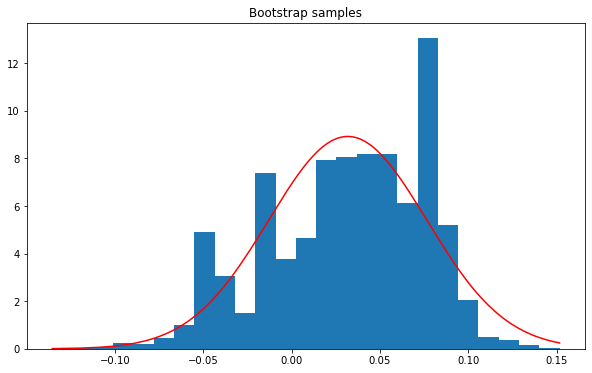

Standard deviation of Bootstrapped median = 0.04471469136370194
Theoretical value = 0.03963327297606011


In [4]:
# Bootstrap function that takes data, number of resamples and function to be applied
# and returns the bootstrap statistics
def bootstrap(data, n, func):
    stats = []

    for i in range(n):
        bootstrapped_sample = np.random.choice(data, size=len(data), replace=True)
        stats.append(func(bootstrapped_sample))
    return np.array(stats)

# Genearating samples from a normal distribution
data = np.random.normal(0, 1, 1000)

# Getting median of 10,000 bootstrap samples
bootstrap_medians = bootstrap(data, 10000, np.median)

# Plotting the histogram of the bootstrap samples
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_medians, bins=25, density=True)

# Plotting the gaussian curve
bootstrap_medians.sort()    # Sort the array to get a smooth gaussian curve
plt.plot(bootstrap_medians, st.norm.pdf(bootstrap_medians, loc=bootstrap_medians.mean(), scale=bootstrap_medians.std()), color='red')
plt.title("Bootstrap samples")
plt.show()

# Comparing the standard deviation of the bootstrap samples with the theoretical value
print(f"Standard deviation of Bootstrapped median = {bootstrap_medians.std()}")
print(f"Theoretical value = {(np.pi/2000)**0.5}")

# Question 2
arXiv:1008.4686, Exercise 1 on Page 5, except the last sentence of the question related to $\sigma_{m}^{2}$. \
(Hint : Use $\chi^2$ minimization to obtain best-fit values of $b$ and $m$, instead of linear algebra. \
You can look up curve fitfunction in scipy.)

Best fit parameters = [ 2.2399 34.0477]


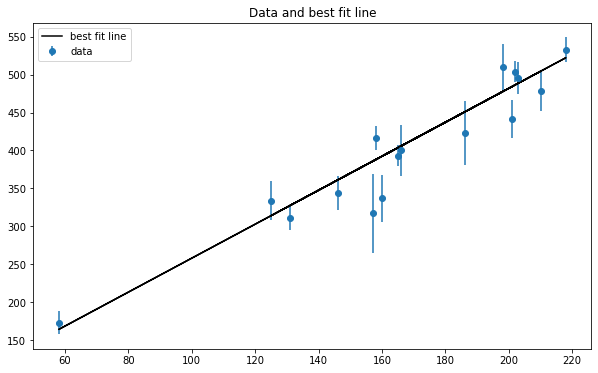

In [9]:
# Line function to be fitted
def line_fn(x, m, b):
    y = m*x + b
    return y
    
# Loading the data
data = np.loadtxt('table.txt')
x = data[:, 1] 
y = data[:, 2]  
err_y = data[:, 3]  # Error in y data

# Performing the chi2 minimization
chi2param = curve_fit(line_fn, xdata=x, ydata=y, sigma=err_y)

print(f"Best fit parameters = {np.round(chi2param[0], 4)}")

# Plotting the data and the best fit line
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=err_y, fmt='o', label='data')
plt.plot(x, chi2param[0][1] + chi2param[0][0]*x, color='black', label='best fit line')
plt.title("Data and best fit line")
plt.legend()
plt.show()

# Question 3
Calculate the $p$-value for the four chi-square values for the plot shown in class from astroMl \
book which can be found at https://www.astroml.org/book_figures_1ed/chapter4/fig_chi2_eval.html. \
(Hint : You can read off the $\chi^2$ values from the graph by multiplying by D.O.F.)

In [11]:
# Generate Dataset
np.random.seed(1)

N = 50
L0 = 10
dL = 0.2

t = np.linspace(0, 1, N)
L_obs = np.random.normal(L0, dL, N)


y_vals = [L_obs, L_obs, L_obs, L_obs + 0.5 - t ** 2]
y_errs = [dL, dL * 2, dL / 2, dL]
titles = ['correct errors',
          'overestimated errors',
          'underestimated errors',
          'incorrect model']

for i in range(4):

    # Compute the mean and the chi^2
    mu = np.mean(y_vals[i])
    z = (y_vals[i] - mu) / y_errs[i]
    chi2 = np.sum(z ** 2)

    #Calculating and printing the p-value
    print(f'p-value for {titles[i]} = {st.chi2(N - 1).sf(chi2):.5f}')

p-value for correct errors = 0.55435
p-value for overestimated errors = 1.00000
p-value for underestimated errors = 0.00000
p-value for incorrect model = 0.00000
